## Skriptsprachen – 27.04.2023 – Themen heute:

1. Das "Springer-Problem"
2. Typen aus dem Modul `collections`

# Springer-Problem

Springer zieht wie folgt auf (verallgemeinertem) Schachbrett:

- zwei Felder in eine Richtung
- dann ein Feld in eine Querrichtung (90° gedreht)

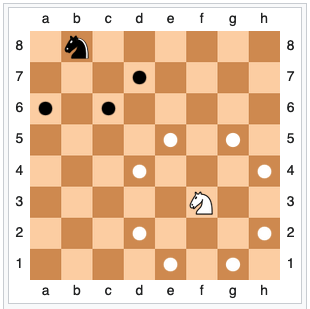

(Grafik: Wikipedia, https://en.wikipedia.org/wiki/Knight_(chess) )

**Springer-Problem:** Finde zu einem Startpunkt eine Folge von Springer-Zügen, so dass das ganze Brett besucht wird, jedes Feld genau 1-mal.

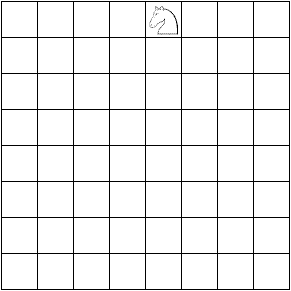
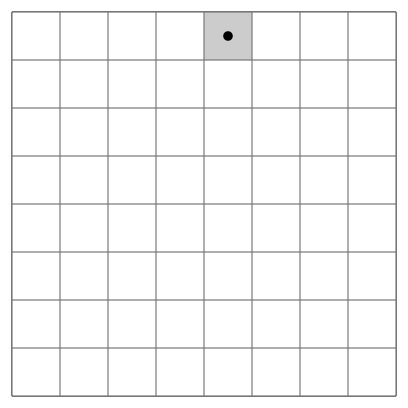

(Grafiken: Tobias Pfanner, Ilmari Karonen, Wikimedia)

## 1. Schritt: mögliche Züge bestimmen

In [11]:
SIZE = 6

In [12]:
def springer_zuege(p, verboten={}):
    """Alle Felder, die ein Springer ab Position p in einem Zug erreicht"""
    liste = []
    x, y = p
    for dx in [1,2,-1,-2]:
        for dy in [2//dx, -2//dx]:
            xn, yn = x+dx, y+dy
            if 0 <= xn < SIZE and 0 <= yn < SIZE and not (xn,yn) in verboten:
                # yield xn, yn
                liste.append((xn,yn))
    return liste

In [13]:
springer_zuege((2,2), verboten={(3,4),(3,0)})

[(4, 3), (4, 1), (1, 0), (1, 4), (0, 1), (0, 3)]

## Für Tests: Ausgabe einer Brett-Belegung

In [14]:
def ausgabe_brett(n,belegung):
    for x in range(n-1,-1,-1):
        for y in range(n):
            if (y,x) in belegung:
                print ("X",end="")
            else:
                print (".",end="")
        print ("")
    print ("")                 

In [15]:
ausgabe_brett(5,[(0,0),(0,1)])

.....
.....
.....
X....
X....



## Für Tests: Ausgabe einer Brett-Belegung

In [16]:
def ausgabe(n,zuege):
    for i in range(len(zuege)):
        ausgabe_brett(n,zuege[:i+1])

In [17]:
ausgabe(5,[(0,0),(1,2),(2,4)])

.....
.....
.....
.....
X....

.....
.....
.X...
.....
X....

..X..
.....
.X...
.....
X....



Ausgabe in Schach-Notation, `(0,0) = "a1"` etc.

In [18]:
def schach_ausgabe(positionen, rev=False, numeric=False):
    ps = list(positionen)
    if rev: ps.reverse()
    spalten = "abcdefghijklmnopqrstuvwxyz"
    zeilen  = "123456789ABCDEFGHIJKLMNOPQ"
    for (x,y) in ps:
        if 0<=x<=25 and 0<=y<=25:
            if numeric:
                print(f"{x},{y}", end=" ")
            else:
                print(f"{spalten[x]}{zeilen[y]}", end=" ")
        else:
            print ("??", end=" ")
    print ("")

schach_ausgabe([(0,0),(1,2),(2,4)])       
schach_ausgabe([(0,0),(1,0)], rev=True, numeric=True)       

a1 b3 c5 
1,0 0,0 


## 2. Schritt: Suche

Der Code, den ich in der Vorlesung nicht ans Laufen gebracht habe, war i.w. ok; nach einer kleinen Änderung funktioniert er: Beim Start der Funktion muss man eine Kopie der Besucht-Menge erstellen und darauf arbeiten...

In [19]:
def suche (start, besucht_arg = set([])):
    besucht = besucht_arg.copy()  # auf Kopie arbeiten...
    besucht.add(start)
    if len(besucht) == SIZE**2:
        return True, [start]
    # müssen suchen
    erreichbar = springer_zuege(start, verboten=besucht)
    # sortieren nach Anzahl, die von dort erreichbar ist...
    erreichbar = sorted (erreichbar, key = lambda x : len(springer_zuege(x)))
    for feld in erreichbar:
        besucht.add(feld)
        ergebnis, liste = suche(feld, besucht)
        if ergebnis:
            return True, liste+[start]
        besucht.remove(feld)
    # alles ausprobiert, mehr Lösungen gibt es nicht
    return False, []


In [20]:
res, pfad = suche((0,2))
print(res, len(pfad))
schach_ausgabe(pfad, True)

True 36
a3 b1 d2 f1 e3 f5 d6 b5 c3 a2 c1 e2 f4 e6 c5 a6 b4 c6 a5 b3 a1 c2 d4 f3 e1 d3 e5 c4 b6 a4 b2 d1 f2 e4 f6 d5 


Die alternative Version in der Schleife funktioniert nicht für größere Bretter, weil sie Breitensuche macht und damit riesige Datenmengen erzeugt.

In [21]:
def alternativ(p):
    liste = list(springer_zuege(p))
    dliste = [ [p, q] for q in liste ]

    while True:
        print (dliste)
        yliste = []
        for liste in dliste:
            q = liste[-1]
            erreichbare = list(springer_zuege(q))
            dliste = [liste + [r] for r in erreichbare if not r in liste]
            if dliste != [] and len(dliste[0]) == SIZE**2:
                print ("TREFFER: ", dliste[0])
            #dliste = []
            #for q in xliste:
            #    if not q in liste:
            #        dliste.append (liste+[q])
            #        if len(liste+[q]) == SIZE**2:
            #            return liste+[q]
            
            yliste = yliste + dliste
        
        dliste = yliste # nächster Durchlauf
        
    # return yliste

In [22]:
#alternativ((0,0))

# Collections

Das Modul `collections` stellt einige erweiterte Typen bereit, darunter u.a. ein Dictionary, das bei Zugriffsversuchen mit unbekannten Schlüsseln automatisch einen neuen Schlüssel erzeugt und einen Default-Wert zuordnet, etwa 0 bei Integers oder {} bei Mengen.

Mehr Informationen hier: https://docs.python.org/3/library/collections.html 

In [26]:
import collections
zaehler = collections.defaultdict(int)
satz = "Das ist ein langer Satz mit vielen schönen Worten."
for c in satz:
    zaehler[c] += 1
zaehler  # wie oft kommt welcher Buchstabe vor

defaultdict(int,
            {'D': 1,
             'a': 3,
             's': 3,
             ' ': 8,
             'i': 4,
             't': 4,
             'e': 6,
             'n': 6,
             'l': 2,
             'g': 1,
             'r': 2,
             'S': 1,
             'z': 1,
             'm': 1,
             'v': 1,
             'c': 1,
             'h': 1,
             'ö': 1,
             'W': 1,
             'o': 1,
             '.': 1})

Beim ersten `+=1` für jeden Buchstaben wird dieser als Schlüssel hinzugefügt. Das klappt auch bei Lesezugriffen für (bisher) nicht bekannte Schlüssel:

In [27]:
zaehler['Y']

0